# Chess statistics

In [1]:
import chess
import numpy as np
import pandas as pd
import random

from tqdm import tqdm
from multiprocessing.pool import ThreadPool
import matplotlib.pyplot as plt

In [2]:
def collect_move_average_per_game(dummy) -> float:
    '''
    ADD
    '''
    moves = []
    board = chess.Board()
    
    while not (board.is_checkmate() or board.is_stalemate() or board.is_insufficient_material()):
        moves += [len([move for move in board.legal_moves])]
        move = random.choice([move for move in board.legal_moves])
        board.push(move)
    
    return np.mean(moves)

In [3]:
agg = []
for i in tqdm(range(10)):
    res = ThreadPool(32).map(collect_move_average_per_game,[None for _ in range(10)])
    agg += [np.mean(res)]
np.mean(agg)

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:04<00:00,  2.38it/s]


22.49664287185657

In [4]:
value = 0
games = 0
for _ in range(200):
    result = 1 if random.random() > 0.1 else 0
    games += 1
    value = value + ((result-value)/games)
value

0.8900000000000001

In [5]:
# values = np.arange() 
# lambda loss

In [6]:
values = np.linspace(0,1,1000)

In [7]:
loss = lambda val, loss: val*0.5**loss

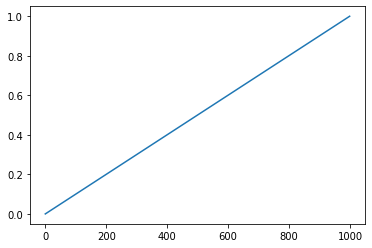

In [8]:
plt.plot(values)

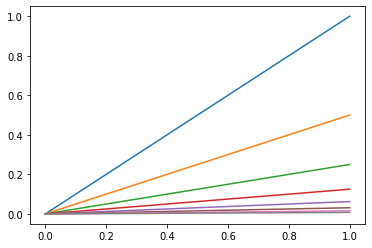

In [9]:
fig = plt.figure()

x = np.linspace(0,1,1000)
loss = lambda val, loss: val*0.5**loss

plt.plot(x,x)
plt.plot(x,loss(x,1))
plt.plot(x,loss(x,2))
plt.plot(x,loss(x,3))
plt.plot(x,loss(x,4))
plt.plot(x,loss(x,5))
plt.plot(x,loss(x,6))
plt.plot(x,loss(x,7))

plt.show()

In [10]:
chess.Board().legal_moves

<LegalMoveGenerator at 0x1e1fffbb910 (Nh3, Nf3, Nc3, Na3, h3, g3, f3, e3, d3, c3, b3, a3, h4, g4, f4, e4, d4, c4, b4, a4)>